In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)




In [3]:
y = 2*X+1 + e

In [4]:
y.shape

torch.Size([50, 1])

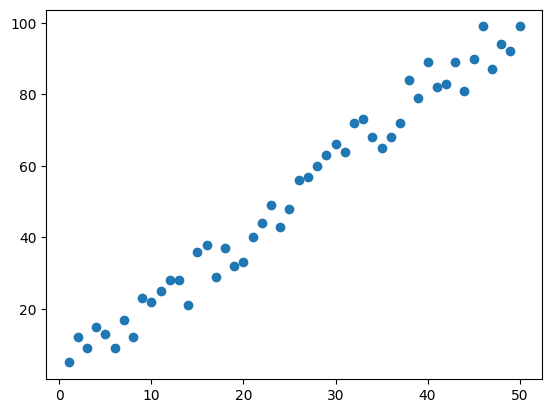

In [5]:
plt.scatter(X.numpy(), y)

In [6]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [7]:
class Model(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred


In [8]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)


Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [9]:
for name , param in model.named_parameters():
  print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [10]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [11]:
X1 = np.linspace(0.0,50.0,50)
X1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [12]:
w1 = 0.1059
b1 = 0.9673
y1 = w1 * X1 + b1
y1

array([0.9673    , 1.07536122, 1.18342245, 1.29148367, 1.3995449 ,
       1.50760612, 1.61566735, 1.72372857, 1.8317898 , 1.93985102,
       2.04791224, 2.15597347, 2.26403469, 2.37209592, 2.48015714,
       2.58821837, 2.69627959, 2.80434082, 2.91240204, 3.02046327,
       3.12852449, 3.23658571, 3.34464694, 3.45270816, 3.56076939,
       3.66883061, 3.77689184, 3.88495306, 3.99301429, 4.10107551,
       4.20913673, 4.31719796, 4.42525918, 4.53332041, 4.64138163,
       4.74944286, 4.85750408, 4.96556531, 5.07362653, 5.18168776,
       5.28974898, 5.3978102 , 5.50587143, 5.61393265, 5.72199388,
       5.8300551 , 5.93811633, 6.04617755, 6.15423878, 6.2623    ])

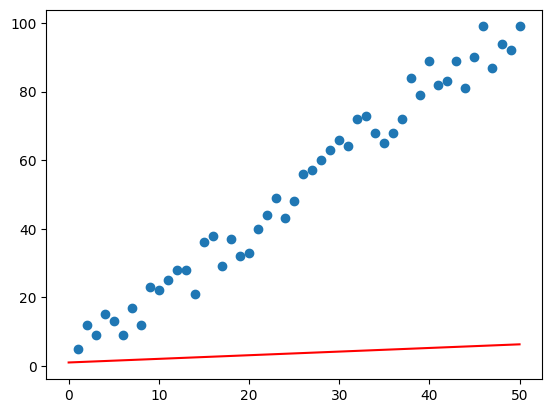

In [13]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(X1, y1, 'r')

In [14]:
criterion = nn.MSELoss()

In [15]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [16]:
epochs = 50
losses = []


for i in range(epochs):
  i = i+1

  y_pred = model.forward(X)

  loss = criterion(y_pred, y)

  losses.append(float(loss.detach().numpy()))

  print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias :{model.linear.bias.item()}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias :0.9637961387634277
epoch 2 loss: 1588.5306396484375 weight: 3.334900140762329 bias :1.0604636669158936
epoch 3 loss: 830.2999267578125 weight: 1.014832854270935 bias :0.9922628402709961
epoch 4 loss: 438.8521728515625 weight: 2.6817994117736816 bias :1.0425218343734741
epoch 5 loss: 236.76144409179688 weight: 1.4840213060379028 bias :1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias :1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504 bias :1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias :1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias :1.0214954614639282
epoch 10 loss: 28.989229202270508 weight: 2.0806007385253906 bias :1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias :1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias :1.029116272

Text(0.5, 0, 'Epoch')

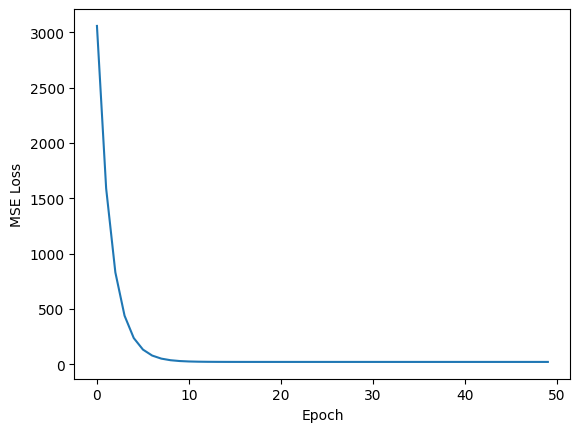

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel("MSE Loss")
plt.xlabel("Epoch")

In [18]:
x = np.linspace(0.0, 50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight* x + current_bias

In [19]:
x

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [20]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

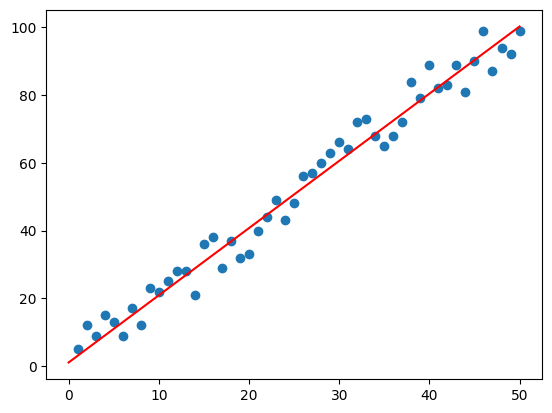

In [21]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')

# iris with pytorch

In [22]:
import torch
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

In [23]:
dataset = load_iris()
X= dataset.data
y = dataset.target

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 ,random_state=33)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [26]:
from torch.utils.data import TensorDataset, DataLoader
iris = TensorDataset(torch.FloatTensor(X), torch.LongTensor(y))

In [27]:
for i in range(5):
  print(iris[i])

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))


In [28]:
iris_loader = DataLoader(iris, batch_size = 50, shuffle=True)

In [29]:
import torch.nn.functional as F

In [30]:
class Model2(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)


    #input layer 4 featrues h1 N h2 N output (3 classes)


  def forward(self,X):
    X= F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.out(X)

    return X

In [31]:
torch.manual_seed(32)
model2 = Model2()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 ,random_state=33)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

y_train.shape

torch.Size([120])

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)

In [34]:
model2.parameters()

<generator object Module.parameters at 0x7ce22249eab0>

In [36]:
X_train

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1

In [ ]:
epochs = 100
losses = []

for i in range(epochs):

  #Forward and get a predection
  y_pred = model2(X_train)

  #calcuate loss
  loss = criterion(y_pred, y_train)

  losses.append(loss)

  if(i==10 or i==20):
    print(f"Epoch {i} and loss is {loss}")
    print(y_train)
    print(y_pred)
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


In [38]:
X_test

tensor([[5.7000, 2.9000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [4.8000, 3.0000, 1.4000, 0

In [39]:
with torch.no_grad():
  y_eval = model2.forward(X_test)
  loss = criterion(y_eval, y_test)

In [40]:
loss

tensor(0.0582)

In [46]:
correct = 0
wrong = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model2.forward(data)

    if(y_val.argmax().item() == y_test[i]):
      correct+=1

    else:
      wrong+=1

In [47]:
print(f'correct {correct}')
print(f'wrong {wrong}' )

correct 30
wrong 0


In [51]:
torch.save(model2.state_dict(), 'my_iris_model.pt')

In [52]:
new_Model = Model2()
new_Model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [53]:
new_Model.eval()

Model2(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [56]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [60]:
with torch.no_grad():
  prediction = new_Model(mystery_iris)
  print(prediction.argmax().item())

0
